#Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#The Dataset

In [2]:
dataset = pd.read_csv('kidney_disease.csv')
#dataset.head()
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


#Exploratory Data Analysis and Missing Data Handling

Visualizing the missing data heatmap

<Figure size 720x432 with 0 Axes>

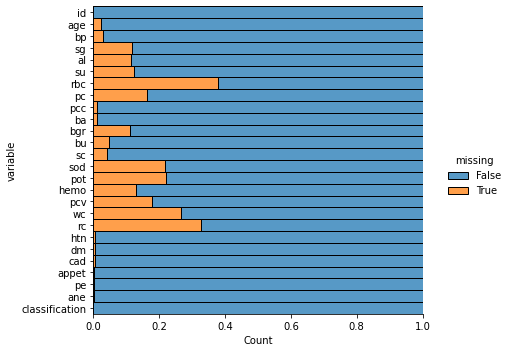

In [3]:
plt.figure(figsize=(10,6))
sns.displot(
    data=dataset.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

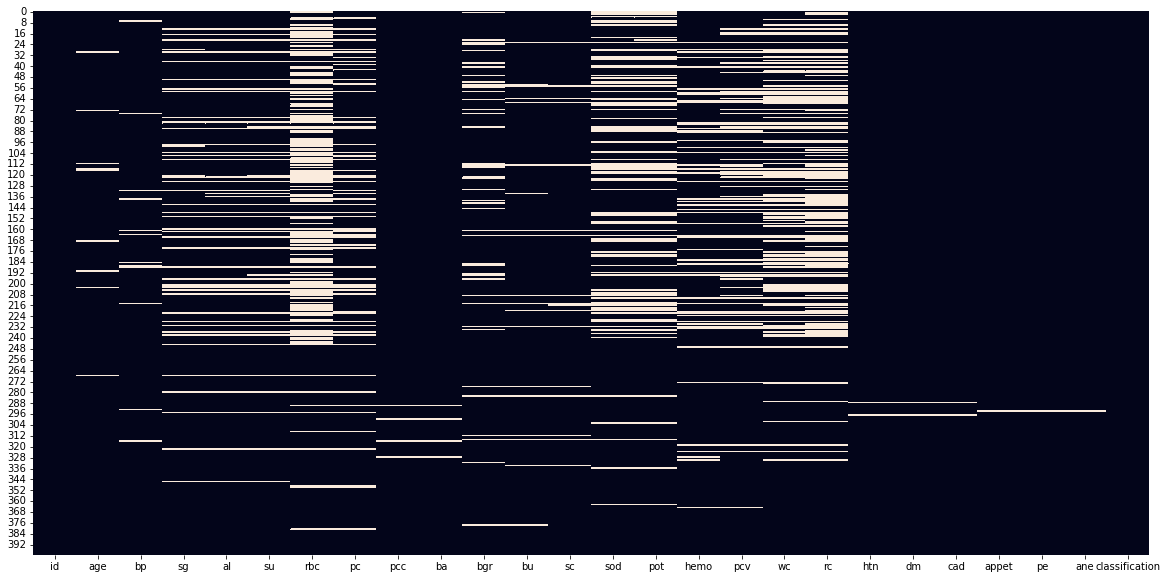

In [4]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataset.isnull(), cbar=False)

Finding the percentage of missing data for each attribute

In [5]:
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

                   column_name  percent_missing
id                          id             0.00
age                        age             2.25
bp                          bp             3.00
sg                          sg            11.75
al                          al            11.50
su                          su            12.25
rbc                        rbc            38.00
pc                          pc            16.25
pcc                        pcc             1.00
ba                          ba             1.00
bgr                        bgr            11.00
bu                          bu             4.75
sc                          sc             4.25
sod                        sod            21.75
pot                        pot            22.00
hemo                      hemo            13.00
pcv                        pcv            17.75
wc                          wc            26.50
rc                          rc            32.75
htn                        htn          

Dropping the columns with more than 20% missing value

In [6]:
dataset = dataset.dropna(thresh=0.8*len(dataset), axis=1)
dataset

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,sc,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,...,1.2,15.4,44.0,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,...,0.8,11.3,38.0,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,...,1.8,9.6,31.0,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,...,3.8,11.2,32.0,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,...,1.4,11.6,35.0,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,140.0,...,0.5,15.7,47.0,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,...,1.2,16.5,54.0,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,100.0,...,0.6,15.8,49.0,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,...,1.0,14.2,51.0,no,no,no,good,no,no,notckd


In [7]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataset.iloc[:,6] = label.fit_transform(dataset.iloc[:,6])
dataset.iloc[:,7] = label.fit_transform(dataset.iloc[:,7])
dataset.iloc[:,8] = label.fit_transform(dataset.iloc[:,8])
dataset.iloc[:,14] = label.fit_transform(dataset.iloc[:,14])
dataset.iloc[:,15] = label.fit_transform(dataset.iloc[:,15])
dataset.iloc[:,16] = label.fit_transform(dataset.iloc[:,16])
dataset.iloc[:,17] = label.fit_transform(dataset.iloc[:,17])
dataset.iloc[:,18] = label.fit_transform(dataset.iloc[:,18])
dataset.iloc[:,19] = label.fit_transform(dataset.iloc[:,19])
dataset.iloc[:,20] = label.fit_transform(dataset.iloc[:,20])
dataset.loc[(dataset.classification == 1),'classification']=0
dataset.loc[(dataset.classification == 2),'classification']=1
dataset.drop('id', axis=1, inplace=True)
display(dataset)

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,0,0,121.0,36.0,1.2,15.4,44.0,1,2,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,0,0,NaN,18.0,0.8,11.3,38.0,0,1,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,0,0,423.0,53.0,1.8,9.6,31.0,0,2,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,0,1,0,117.0,56.0,3.8,11.2,32.0,1,1,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,0,0,106.0,26.0,1.4,11.6,35.0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,0,0,140.0,49.0,0.5,15.7,47.0,0,1,1,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,0,0,75.0,31.0,1.2,16.5,54.0,0,1,1,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,0,0,100.0,26.0,0.6,15.8,49.0,0,1,1,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,0,0,114.0,50.0,1.0,14.2,51.0,0,1,1,0,0,0,1


In [8]:
column_names = dataset.columns

Correlation among the features

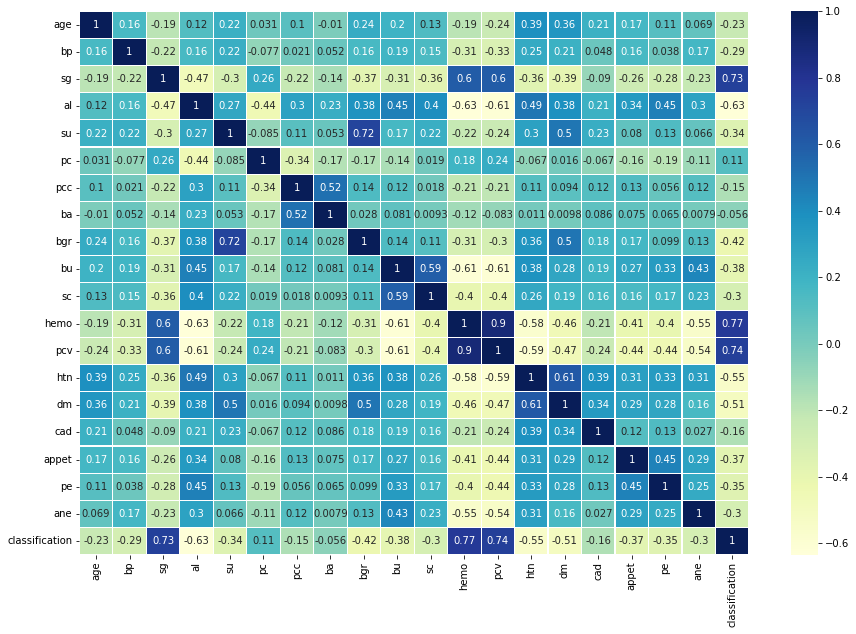

In [9]:
plt.figure(figsize=(15,10))
corr = dataset.corr()
sns.heatmap(corr,linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

Comparing the distribution of highly correlated attributes i.e., correlation above 0.5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


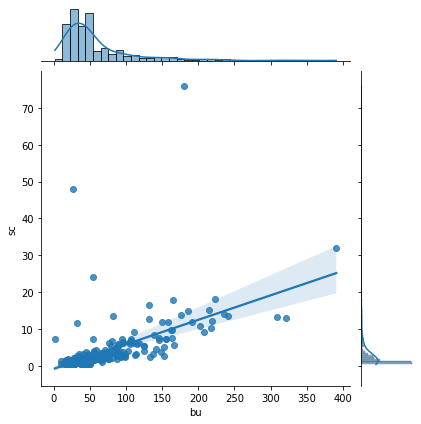

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


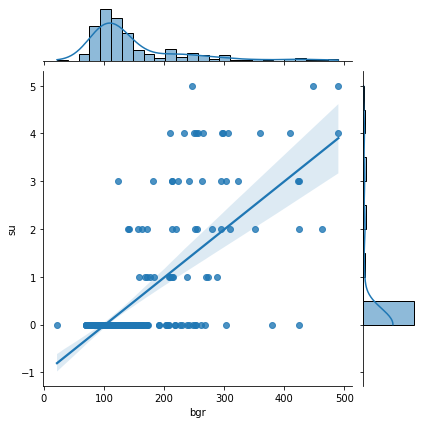

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


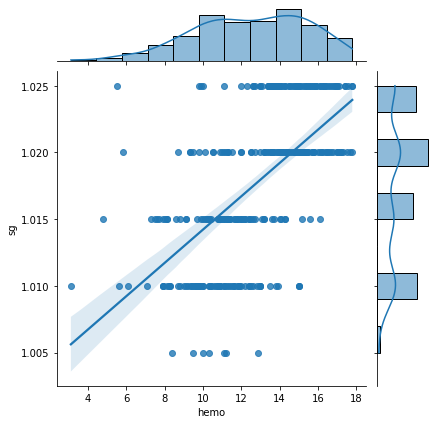

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


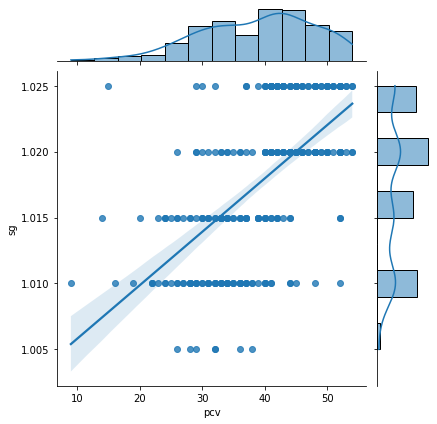

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


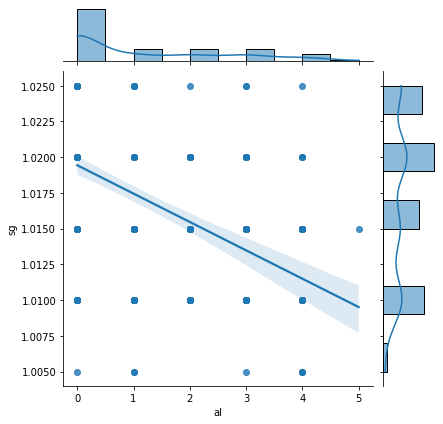

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


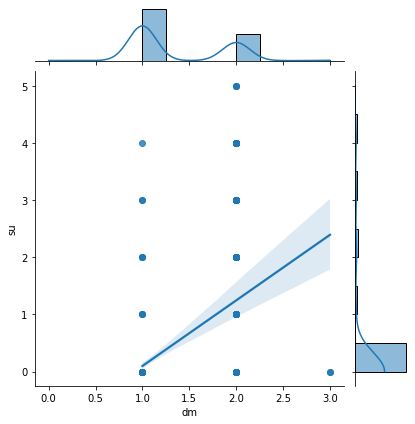

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


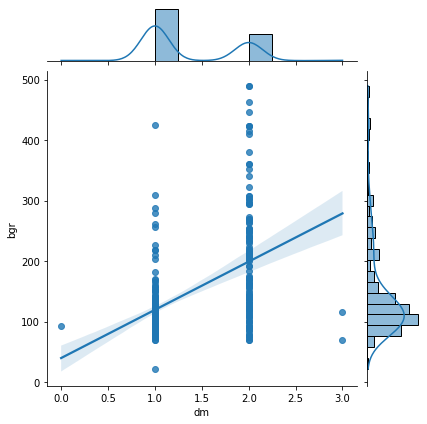

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


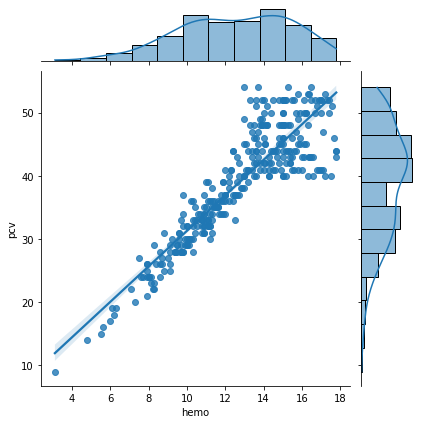

In [10]:
sns.jointplot(dataset['bu'], dataset['sc'], kind='reg')
plt.show()
sns.jointplot(dataset['bgr'], dataset['su'], kind='reg')
plt.show()
sns.jointplot(dataset['hemo'], dataset['sg'], kind='reg')
plt.show()
sns.jointplot(dataset['pcv'], dataset['sg'], kind='reg')
plt.show()
sns.jointplot(dataset['al'], dataset['sg'], kind='reg')
plt.show()
sns.jointplot(dataset['dm'], dataset['su'], kind='reg')
plt.show()
sns.jointplot(dataset['dm'], dataset['bgr'], kind='reg')
plt.show()
sns.jointplot(dataset['hemo'], dataset['pcv'], kind='reg')
plt.show()

The following figure shows that there is somewhat a class imbalance problem. So, evaluating with accuracy may not be appropriate.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


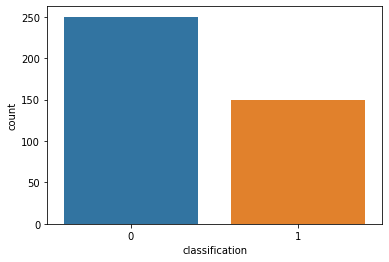

In [11]:
sns.countplot('classification', data = dataset)

Filling missing values

Taking care of missing data by using K Nearest Neighbour Imputation Algorithm

In [12]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values

In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan, n_neighbors=7)
X = imputer.fit_transform(X)

In [14]:
dataset.describe()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,400.000000,400.000000,400.000000,356.000000,381.000000,383.000000,348.000000,329.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.972500,0.125000,0.075000,148.036517,57.425722,3.072454,12.526437,38.884498,0.377500,1.34750,1.092500,0.210000,0.195000,0.15500,0.375000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.593823,0.360138,0.299331,79.281714,50.503006,5.741126,2.912587,8.990105,0.495588,0.49229,0.314947,0.413918,0.402965,0.36921,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,3.100000,9.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,1.000000,0.000000,0.000000,99.000000,27.000000,0.900000,10.300000,32.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,1.000000,0.000000,0.000000,121.000000,42.000000,1.300000,12.650000,40.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,1.000000,0.000000,0.000000,163.000000,66.000000,2.800000,15.000000,45.000000,1.000000,2.00000,1.000000,0.000000,0.000000,0.00000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,2.000000,2.000000,2.000000,490.000000,391.000000,76.000000,17.800000,54.000000,2.000000,3.00000,3.000000,2.000000,2.000000,2.00000,1.000000


<Figure size 720x432 with 0 Axes>

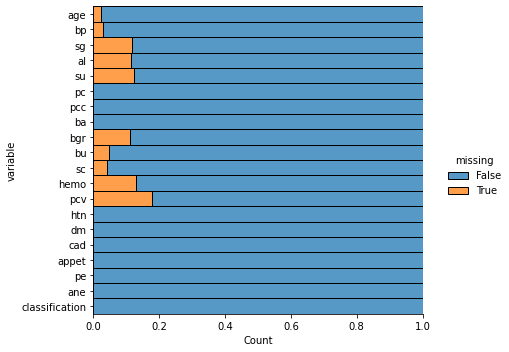

In [15]:
plt.figure(figsize=(10,6))
sns.displot(
    data=dataset.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

<Figure size 720x432 with 0 Axes>

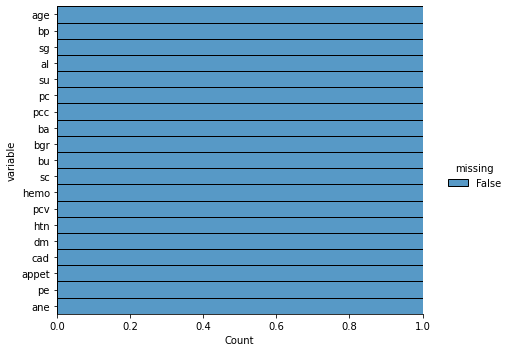

In [16]:
df = pd.DataFrame(X, columns=column_names[:-1])
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [17]:
from imblearn.over_sampling import SVMSMOTE
ros = SVMSMOTE(k_neighbors=5)
X, y = ros.fit_resample(X, y)

#Feature Selection

Strongly correlated features are selected here

In [18]:
df = pd.DataFrame(X, columns=column_names[:-1])
df.drop(['bp','pc','cad','ane','age','pcc','ba','pcv'], axis=1, inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sg      500 non-null    float64
 1   al      500 non-null    float64
 2   su      500 non-null    float64
 3   bgr     500 non-null    float64
 4   bu      500 non-null    float64
 5   sc      500 non-null    float64
 6   hemo    500 non-null    float64
 7   htn     500 non-null    float64
 8   dm      500 non-null    float64
 9   appet   500 non-null    float64
 10  pe      500 non-null    float64
dtypes: float64(11)
memory usage: 43.1 KB


,sg,al,su,bgr,bu,sc,hemo,htn,dm,appet,pe
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.018346,0.831965,0.374192,142.441888,53.164552,2.639389,13.063866,0.308483,1.284483,0.172586,0.160586
std,0.005517,1.221936,0.952550,69.545304,45.578138,5.133183,2.719048,0.492977,0.487079,0.391199,0.380813
min,1.005000,-0.345775,-0.047099,22.000000,1.500000,0.157542,3.100000,-0.978451,0.000000,0.000000,0.000000
25%,1.015000,0.000000,0.000000,102.265587,26.974195,0.800000,11.200000,0.000000,1.000000,0.000000,0.000000
50%,1.020000,0.000000,0.000000,121.270154,41.000000,1.200000,13.513123,0.000000,1.000000,0.000000,0.000000
75%,1.025000,1.428571,0.000000,148.500000,55.000000,2.389286,15.000000,1.000000,2.000000,0.000000,0.000000
max,1.027452,5.000000,5.000000,490.000000,391.000000,76.000000,19.679217,2.582199,3.582199,2.293070,2.293070


Here are 10 features (sg, al, su, bgr, bu, sc, hemo, htn, dm, appet, pe)

In [19]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

      column_name  percent_missing
sg             sg              0.0
al             al              0.0
su             su              0.0
bgr           bgr              0.0
bu             bu              0.0
sc             sc              0.0
hemo         hemo              0.0
htn           htn              0.0
dm             dm              0.0
appet       appet              0.0
pe             pe              0.0


In [20]:
X = df.iloc[:,:].values

#Splitting and Scaling

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Nearest Neighbour Approach

Applying elbow method to get the best K for KNN

Text(0, 0.5, 'Mean Error')

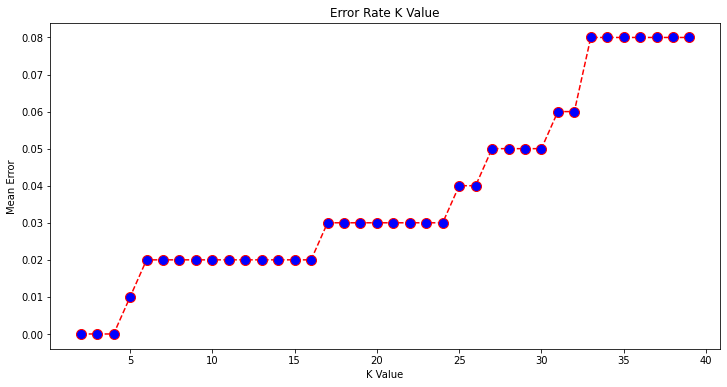

In [23]:
from sklearn.neighbors import KNeighborsClassifier
error = []

for i in range(2, 40):
    knn = KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski')
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(2, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Chosing 5 as the value of K

[[48  1]
 [ 0 51]]
0.99
              precision    recall  f1-score   support

           0     1.0000    0.9796    0.9897        49
           1     0.9808    1.0000    0.9903        51

    accuracy                         0.9900       100
   macro avg     0.9904    0.9898    0.9900       100
weighted avg     0.9902    0.9900    0.9900       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x432 with 0 Axes>

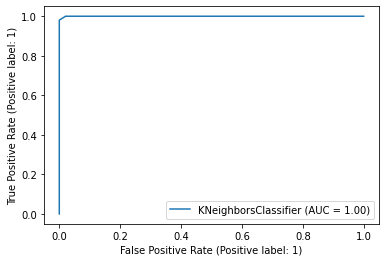

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
from sklearn import metrics
fig = plt.figure(figsize=(6,6))
metrics.plot_roc_curve(classifier, x_test, y_test) 
plt.show()
#y_pred = classifier.predict(user_input)
#y_pred

In [29]:
from sklearn.model_selection import KFold
from statistics import mean
kfold = KFold(n_splits = 5)
result_accuracy1 =[]
result_precision1 =[]
result_recall1 =[]
result_f11 =[]
classifier_ = KNeighborsClassifier(n_neighbors = 5)
for train_index, text_index in kfold.split(X):
  Xtrain, Xtest, ytrain, ytest = X[train_index], X[text_index], y[train_index], y[text_index]
  classifier_.fit(Xtrain, ytrain)
  y_pred = classifier_.predict(Xtest)
  result_accuracy1.append(accuracy_score(ytest,y_pred))
  result_precision1.append(precision_score(ytest,y_pred))
  result_recall1.append(recall_score(ytest,y_pred))
  result_f11.append(f1_score(ytest,y_pred))
print(mean(result_accuracy1))
print(mean(result_precision1))
print(mean(result_recall1))
print(mean(result_f11))

0.836
0.5580645161290323
0.564
0.5581524099001303


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Support vector machine approach

[[48  1]
 [ 1 50]]
0.98
              precision    recall  f1-score   support

           0     0.9796    0.9796    0.9796        49
           1     0.9804    0.9804    0.9804        51

    accuracy                         0.9800       100
   macro avg     0.9800    0.9800    0.9800       100
weighted avg     0.9800    0.9800    0.9800       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


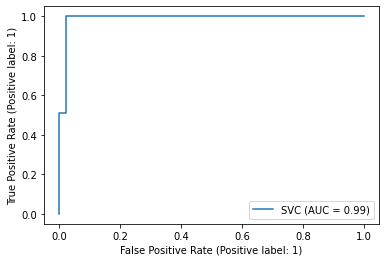

In [31]:
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'linear', random_state = 0)
classifier1.fit(x_train, y_train)
y_pred = classifier1.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier1, x_test, y_test) 
plt.show()

In [32]:
result_accuracy2 =[]
result_precision2 =[]
result_recall2 =[]
result_f12 =[]
classifier1 = SVC(kernel = 'linear', random_state = 0)
for train_index, text_index in kfold.split(X):
  Xtrain, Xtest, ytrain, ytest = X[train_index], X[text_index], y[train_index], y[text_index]
  classifier1.fit(Xtrain, ytrain)
  y_pred = classifier1.predict(Xtest)
  result_accuracy2.append(accuracy_score(ytest,y_pred))
  result_precision2.append(precision_score(ytest,y_pred))
  result_recall2.append(recall_score(ytest,y_pred))
  result_f12.append(f1_score(ytest,y_pred))
print(mean(result_accuracy2))
print(mean(result_precision2))
print(mean(result_recall2))
print(mean(result_f12))

0.962
0.5818181818181818
0.594
0.5874509633303603


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


With "poly" as kernel.

[[45  4]
 [ 0 51]]
0.96
              precision    recall  f1-score   support

           0     1.0000    0.9184    0.9574        49
           1     0.9273    1.0000    0.9623        51

    accuracy                         0.9600       100
   macro avg     0.9636    0.9592    0.9599       100
weighted avg     0.9629    0.9600    0.9599       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


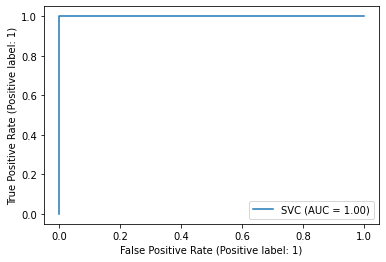

In [35]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'poly', random_state = 0)
classifier2.fit(x_train, y_train)
y_pred = classifier2.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier2, x_test, y_test) 
plt.show()

In [33]:
result_accuracy3 =[]
result_precision3 =[]
result_recall3 =[]
result_f13 =[]
classifier2 = SVC(kernel = 'poly', random_state = 0)
for train_index, text_index in kfold.split(X):
  Xtrain, Xtest, ytrain, ytest = X[train_index], X[text_index], y[train_index], y[text_index]
  classifier2.fit(Xtrain, ytrain)
  y_pred = classifier2.predict(Xtest)
  result_accuracy3.append(accuracy_score(ytest,y_pred))
  result_precision3.append(precision_score(ytest,y_pred))
  result_recall3.append(recall_score(ytest,y_pred))
  result_f13.append(f1_score(ytest,y_pred))
print(mean(result_accuracy3))
print(mean(result_precision3))
print(mean(result_recall3))
print(mean(result_f13))

0.8099999999999999
0.5492537313432836
0.588
0.5648069406863376


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[48  1]
 [ 0 51]]
0.99
              precision    recall  f1-score   support

           0     1.0000    0.9796    0.9897        49
           1     0.9808    1.0000    0.9903        51

    accuracy                         0.9900       100
   macro avg     0.9904    0.9898    0.9900       100
weighted avg     0.9902    0.9900    0.9900       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


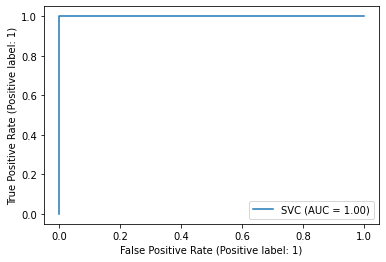

In [34]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'rbf', random_state = 0)
classifier3.fit(x_train, y_train)
y_pred = classifier3.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier3, x_test, y_test) 
plt.show()

In [36]:
result_accuracy4 =[]
result_precision4 =[]
result_recall4 =[]
result_f14 =[]
classifier3 = SVC(kernel = 'rbf', random_state = 0)
for train_index, text_index in kfold.split(X):
  Xtrain, Xtest, ytrain, ytest = X[train_index], X[text_index], y[train_index], y[text_index]
  classifier3.fit(Xtrain, ytrain)
  y_pred = classifier3.predict(Xtest)
  result_accuracy4.append(accuracy_score(ytest,y_pred))
  result_precision4.append(precision_score(ytest,y_pred))
  result_recall4.append(recall_score(ytest,y_pred))
  result_f14.append(f1_score(ytest,y_pred))
print(mean(result_accuracy4))
print(mean(result_precision4))
print(mean(result_recall4))
print(mean(result_f14))

0.7979999999999999
0.5470588235294118
0.588
0.5633582951698956


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Bayesian Approach

Gaussian Naive Bayes

[[44  5]
 [ 2 49]]
0.93
              precision    recall  f1-score   support

           0     0.9565    0.8980    0.9263        49
           1     0.9074    0.9608    0.9333        51

    accuracy                         0.9300       100
   macro avg     0.9320    0.9294    0.9298       100
weighted avg     0.9315    0.9300    0.9299       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


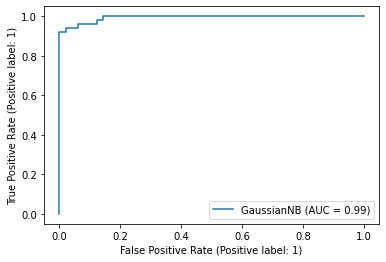

In [37]:
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(x_train, y_train)
y_pred = classifier4.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier4, x_test, y_test) 
plt.show()

In [38]:
result_accuracy5 =[]
result_precision5 =[]
result_recall5 =[]
result_f15 =[]
classifier4 = GaussianNB()
for train_index, text_index in kfold.split(X):
  Xtrain, Xtest, ytrain, ytest = X[train_index], X[text_index], y[train_index], y[text_index]
  classifier4.fit(Xtrain, ytrain)
  y_pred = classifier4.predict(Xtest)
  result_accuracy5.append(accuracy_score(ytest,y_pred))
  result_precision5.append(precision_score(ytest,y_pred))
  result_recall5.append(recall_score(ytest,y_pred))
  result_f15.append(f1_score(ytest,y_pred))
print(mean(result_accuracy5))
print(mean(result_precision5))
print(mean(result_recall5))
print(mean(result_f15))

0.942
0.5764705882352941
0.57
0.5731311640034888


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Bernouli Naive Bayes

[[47  2]
 [ 1 50]]
0.97
              precision    recall  f1-score   support

           0     0.9792    0.9592    0.9691        49
           1     0.9615    0.9804    0.9709        51

    accuracy                         0.9700       100
   macro avg     0.9704    0.9698    0.9700       100
weighted avg     0.9702    0.9700    0.9700       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


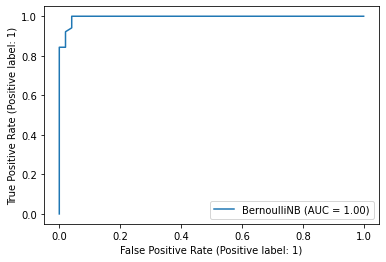

In [39]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(clf, x_test, y_test) 
plt.show()

In [40]:
result_accuracy6 =[]
result_precision6 =[]
result_recall6 =[]
result_f16 =[]
classifier5 = BernoulliNB()
for train_index, text_index in kfold.split(X):
  Xtrain, Xtest, ytrain, ytest = X[train_index], X[text_index], y[train_index], y[text_index]
  classifier5.fit(Xtrain, ytrain)
  y_pred = classifier5.predict(Xtest)
  result_accuracy6.append(accuracy_score(ytest,y_pred))
  result_precision6.append(precision_score(ytest,y_pred))
  result_recall6.append(recall_score(ytest,y_pred))
  result_f16.append(f1_score(ytest,y_pred))
print(mean(result_accuracy6))
print(mean(result_precision6))
print(mean(result_recall6))
print(mean(result_f16))

0.92
0.576
0.566
0.5709133422213106


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Tree based approach

[[48  1]
 [ 3 48]]
0.96
              precision    recall  f1-score   support

           0     0.9412    0.9796    0.9600        49
           1     0.9796    0.9412    0.9600        51

    accuracy                         0.9600       100
   macro avg     0.9604    0.9604    0.9600       100
weighted avg     0.9608    0.9600    0.9600       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


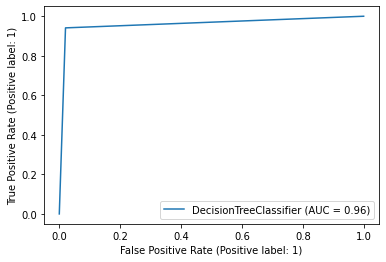

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier5.fit(x_train, y_train)
y_pred = classifier5.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier5, x_test, y_test) 
plt.show()

In [42]:
result_accuracy7 =[]
result_precision7 =[]
result_recall7 =[]
result_f17 =[]
classifier5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
for train_index, text_index in kfold.split(X):
  Xtrain, Xtest, ytrain, ytest = X[train_index], X[text_index], y[train_index], y[text_index]
  classifier5.fit(Xtrain, ytrain)
  y_pred = classifier5.predict(Xtest)
  result_accuracy7.append(accuracy_score(ytest,y_pred))
  result_precision7.append(precision_score(ytest,y_pred))
  result_recall7.append(recall_score(ytest,y_pred))
  result_f17.append(f1_score(ytest,y_pred))
print(mean(result_accuracy7))
print(mean(result_precision7))
print(mean(result_recall7))
print(mean(result_f17))

0.952
0.5958333333333333
0.5619999999999999
0.5780657521214408


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


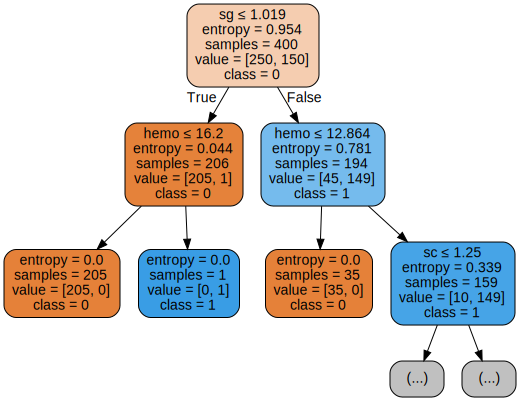

In [43]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(classifier5, out_file=None, 
                      max_depth = 2, 
                      feature_names=df.columns,
                      class_names=['0', '1'],  
                      filled=True, rounded=True,  
                      special_characters=True,)  
graph = graphviz.Source(dot_data)  
graph 

**Random forest**

[[48  1]
 [ 1 50]]
0.98
              precision    recall  f1-score   support

           0     0.9796    0.9796    0.9796        49
           1     0.9804    0.9804    0.9804        51

    accuracy                         0.9800       100
   macro avg     0.9800    0.9800    0.9800       100
weighted avg     0.9800    0.9800    0.9800       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


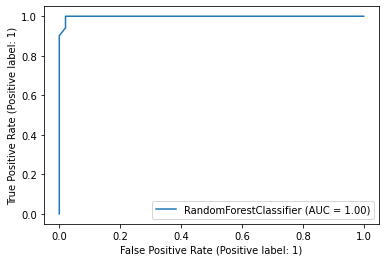

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier6 = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
classifier6.fit(x_train, y_train)
y_pred = classifier6.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier6, x_test, y_test) 
plt.show()

#Linear Models

[[48  1]
 [ 0 51]]
0.99
              precision    recall  f1-score   support

           0     1.0000    0.9796    0.9897        49
           1     0.9808    1.0000    0.9903        51

    accuracy                         0.9900       100
   macro avg     0.9904    0.9898    0.9900       100
weighted avg     0.9902    0.9900    0.9900       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


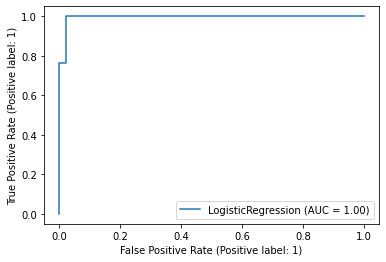

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier7 = LogisticRegression(random_state = 0)
classifier7.fit(x_train, y_train)
y_pred = classifier7.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(classifier7, x_test, y_test) 
plt.show()

#Ensemble Methods

AdaBoost Method

[[48  1]
 [ 3 48]]
0.96
              precision    recall  f1-score   support

           0     0.9412    0.9796    0.9600        49
           1     0.9796    0.9412    0.9600        51

    accuracy                         0.9600       100
   macro avg     0.9604    0.9604    0.9600       100
weighted avg     0.9608    0.9600    0.9600       100



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


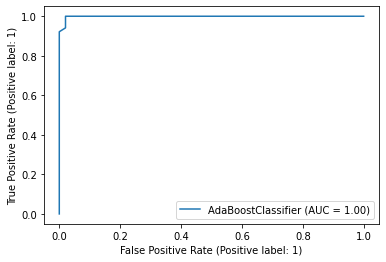

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf1 = AdaBoostClassifier(n_estimators=30) 
clf1.fit(x_train, y_train)
y_pred = clf1.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 4))
metrics.plot_roc_curve(clf1, x_test, y_test) 
plt.show()

##Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
svm_rbf = SVC(kernel = 'rbf', random_state = 0)
gNB = GaussianNB()
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
lr = LogisticRegression(random_state = 0)
hardVoting = VotingClassifier(estimators = [('knn',knn), ('svc',svm_rbf), ('gnb',gNB), ('dt',dt), ('lr',lr)], weights = [1,1,1,1,1]).fit(x_train,y_train)
y_pred = hardVoting.predict(x_test)
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    0.9796    0.9897        49
           1     0.9808    1.0000    0.9903        51

    accuracy                         0.9900       100
   macro avg     0.9904    0.9898    0.9900       100
weighted avg     0.9902    0.9900    0.9900       100



**k-fold on voting**

In [ ]:
from sklearn.model_selection import KFold
from statistics import mean
kfold = KFold(n_splits = 10)
knn = KNeighborsClassifier(n_neighbors = 4)
svm_rbf = SVC(kernel = 'linear', probability=True , random_state = 0)
gNB = GaussianNB()
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
lr = LogisticRegression(random_state = 0)
result_accuracy_1 =[]
result_precision_1 =[]
result_recall_1 =[]
result_f1_1 =[]
classifier_v = VotingClassifier(estimators = [('knn',knn), ('svc',svm_rbf), ('gnb',gNB), ('dt',dt), ('lr',lr)], voting='soft').fit(x_train,y_train)
for train_index, text_index in kfold.split(X):
  Xtrain_v, Xtest_v, ytrain_v, ytest_v = X[train_index], X[text_index], y[train_index], y[text_index]
  classifier_v.fit(Xtrain_v, ytrain_v)
  y_pred = classifier_v.predict(Xtest_v)
  result_accuracy.append(accuracy_score(ytest_v,y_pred))
  result_precision.append(precision_score(ytest_v,y_pred))
  result_recall.append(recall_score(ytest_v,y_pred))
  result_f1.append(f1_score(ytest_v,y_pred))
print(mean(result_accuracy))
print(mean(result_precision))
print(mean(result_recall))
print(mean(result_f1))
print(confusion_matrix(ytest_v, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase t

0.916
0.5193548387096775
0.512
0.5145167120737977
[[ 0  0]
 [ 1 49]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




# Voting with K-fold

In [ ]:
print(X.shape)
print(y.shape)

(500, 11)
(500,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [ ]:
non_ckd = []
ckd = []
j=0
for i in y_train:
  if i == 0:
    non_ckd.append(j)
  elif i == 1:
    ckd.append(j)
  j += 1
print(ckd)
len(ckd)

[0, 1, 3, 4, 5, 7, 9, 10, 11, 13, 16, 17, 20, 22, 26, 28, 30, 33, 35, 39, 40, 41, 42, 45, 48, 49, 52, 53, 54, 55, 57, 59, 60, 61, 62, 63, 69, 71, 72, 76, 78, 83, 85, 88, 91, 92, 93, 94, 95, 97, 98, 99, 101, 103, 104, 105, 108, 110, 111, 112, 113, 115, 116, 118, 119, 120, 121, 128, 130, 132, 134, 135, 138, 140, 144, 149, 150, 155, 157, 159, 160, 161, 164, 167, 168, 169, 170, 171, 175, 183, 187, 189, 190, 191, 194, 195, 197, 198, 202, 203, 204, 206, 211, 219, 220, 222, 223, 225, 226, 228, 229, 230, 234, 235, 240, 242, 245, 246, 247, 248, 249, 251, 253, 254, 255, 257, 259, 261, 262, 265, 266, 267, 268, 269, 271, 273, 274, 276, 278, 280, 283, 286, 287, 288, 292, 297, 300, 301, 303, 304, 305, 307, 308, 310, 312, 315, 317, 318, 320, 324, 326, 328, 329, 330, 331, 335, 336, 337, 338, 339, 342, 344, 345, 347, 348, 349, 350, 353, 354, 355, 356, 358, 360, 361, 363, 366, 375, 376, 377, 378, 379, 380, 382, 383, 386, 387, 388, 389, 392, 394, 395, 397, 400, 401, 403, 406, 407, 409, 412, 414, 417, 419

213

In [ ]:
k1 = []
k2 = []
k3 = []
k4 = []
k5 = []
i = 0
k = 0
for j in range(0,425):
    if j < 85:
      if j % 2 == 0:
        k1.append(ckd[i])
        i += 1
      else:
        k1.append(non_ckd[k])
        k += 1

    elif j < 170:
      if j % 2 == 0:
        k2.append(ckd[i])
        i += 1
      else:
        k2.append(non_ckd[k])
        k += 1

    elif j < 255:
      if j % 2 == 0:
        k3.append(ckd[i])
        i += 1
      else:
        k3.append(non_ckd[k])
        k += 1

    elif j < 340:
      if j % 2 == 0:
        k4.append(ckd[i])
        i += 1
      else:
        k4.append(non_ckd[k])
        k += 1

    else:
      if j % 2 == 0:
        k5.append(ckd[i])
        i += 1
      else:
        k5.append(non_ckd[k])
        k += 1

In [ ]:
Xtrain_cv1 = []
Xtrain_cv2 = []
Xtrain_cv3 = []
Xtrain_cv4 = []
Xtrain_cv5 = []
ytrain_cv1 = []
ytrain_cv2 = []
ytrain_cv3 = []
ytrain_cv4 = []
ytrain_cv5 = []
Xtest_cv1 = []
Xtest_cv2 = []
Xtest_cv3 = []
Xtest_cv4 = []
Xtest_cv5 = []
ytest_cv1 = []
ytest_cv2 = []
ytest_cv3 = []
ytest_cv4 = []
ytest_cv5 = []
z=0
for i in k5 + k2 + k3 + k4 + k1:
  if z < 340:
    Xtrain_cv5.append(x_train[i])
    ytrain_cv5.append(y_train[i])
    z += 1
  else:
    Xtest_cv5.append(x_train[i])
    ytest_cv5.append(y_train[i])
z =0

for i in k1 + k5 + k3 + k4 + k2:
  if z < 340:
    Xtrain_cv4.append(x_train[i])
    ytrain_cv4.append(y_train[i])
    z += 1
  else:
    Xtest_cv4.append(x_train[i])
    ytest_cv4.append(y_train[i])
z =0

for i in k1 + k2 + k5 + k4 + k3:
  if z < 340:
    Xtrain_cv3.append(x_train[i])
    ytrain_cv3.append(y_train[i])
    z += 1
  else:
    Xtest_cv3.append(x_train[i])
    ytest_cv3.append(y_train[i])
z =0

for i in k1 + k2 + k3 + k5 + k4:
  if z < 340:
    Xtrain_cv2.append(x_train[i])
    ytrain_cv2.append(y_train[i])
    z += 1
  else:
    Xtest_cv2.append(x_train[i])
    ytest_cv2.append(y_train[i])
z =0

for i in k1 + k2 + k3 + k4 + k5:
  if z < 340:
    Xtrain_cv1.append(x_train[i])
    ytrain_cv1.append(y_train[i])
    z += 1
  else:
    Xtest_cv1.append(x_train[i])
    ytest_cv1.append(y_train[i])

len(ytrain_cv2)

340

In [ ]:
from sklearn.model_selection import KFold
from statistics import mean
knn = KNeighborsClassifier(n_neighbors = 4)
svm_rbf = SVC(kernel = 'linear', probability=True , random_state = 0)
gNB = GaussianNB()
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
lr = LogisticRegression(random_state = 0)
result_accuracy =[]
result_precision =[]
result_recall =[]
result_f1 =[]
classifier_v = VotingClassifier(estimators = [('knn',knn), ('svc',svm_rbf), ('gnb',gNB), ('dt',dt), ('lr',lr)], voting='soft').fit(x_train,y_train)

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv1, Xtest_cv1, ytrain_cv1, ytest_cv1
classifier_v.fit(Xtrain_v, ytrain_v)
y_pred = classifier_v.predict(Xtest_v)
result_accuracy.append(accuracy_score(ytest_v,y_pred))
result_precision.append(precision_score(ytest_v,y_pred))
result_recall.append(recall_score(ytest_v,y_pred))
result_f1.append(f1_score(ytest_v,y_pred))

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv2, Xtest_cv2, ytrain_cv2, ytest_cv2
classifier_v.fit(Xtrain_v, ytrain_v)
y_pred = classifier_v.predict(Xtest_v)
result_accuracy.append(accuracy_score(ytest_v,y_pred))
result_precision.append(precision_score(ytest_v,y_pred))
result_recall.append(recall_score(ytest_v,y_pred))
result_f1.append(f1_score(ytest_v,y_pred))

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv3, Xtest_cv3, ytrain_cv3, ytest_cv3
classifier_v.fit(Xtrain_v, ytrain_v)
y_pred = classifier_v.predict(Xtest_v)
result_accuracy.append(accuracy_score(ytest_v,y_pred))
result_precision.append(precision_score(ytest_v,y_pred))
result_recall.append(recall_score(ytest_v,y_pred))
result_f1.append(f1_score(ytest_v,y_pred))

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv4, Xtest_cv4, ytrain_cv4, ytest_cv4
classifier_v.fit(Xtrain_v, ytrain_v)
y_pred = classifier_v.predict(Xtest_v)
result_accuracy.append(accuracy_score(ytest_v,y_pred))
result_precision.append(precision_score(ytest_v,y_pred))
result_recall.append(recall_score(ytest_v,y_pred))
result_f1.append(f1_score(ytest_v,y_pred))

Xtrain_v, Xtest_v, ytrain_v, ytest_v = Xtrain_cv5, Xtest_cv5, ytrain_cv5, ytest_cv5
classifier_v.fit(Xtrain_v, ytrain_v)
y_pred = classifier_v.predict(Xtest_v)
result_accuracy.append(accuracy_score(ytest_v,y_pred))
result_precision.append(precision_score(ytest_v,y_pred))
result_recall.append(recall_score(ytest_v,y_pred))
result_f1.append(f1_score(ytest_v,y_pred))

print('accuracy:', mean(result_accuracy))
print('precision:',mean(result_precision))
print('recall:',mean(result_recall))
print('f1 score:',mean(result_f1))
print(confusion_matrix(ytest_v, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


accuracy: 0.9741176470588235
precision: 0.9554141005607133
recall: 0.9952380952380953
f1 score: 0.9748062386519892
[[41  1]
 [ 0 43]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_pred_test = classifier_v.predict(x_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits = 4))

[[35  3]
 [ 0 37]]
              precision    recall  f1-score   support

           0     1.0000    0.9211    0.9589        38
           1     0.9250    1.0000    0.9610        37

    accuracy                         0.9600        75
   macro avg     0.9625    0.9605    0.9600        75
weighted avg     0.9630    0.9600    0.9600        75

